<a href="https://colab.research.google.com/github/r-sathish-02/mnist-classification/blob/main/exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(xtrain, ytrain),(xtest, ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
img= xtrain[50]
img.shape

(28, 28)

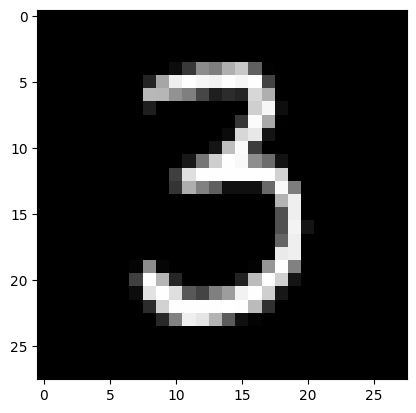

In [6]:
plt.imshow(img,cmap='gray')

In [7]:
xtrainS=xtrain/255.0
xtestS=xtest/255.0

In [8]:
ytren = utils.to_categorical(ytrain,10)
yteen = utils.to_categorical(ytest,10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

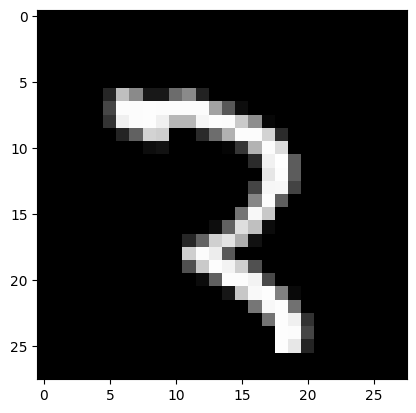

In [9]:
img = xtrain[500]
plt.imshow(img,cmap='gray')
ytren[500]

In [10]:
xtrainS = xtrainS.reshape(-1,28,28,1)
xtestS = xtestS.reshape(-1,28,28,1)

In [11]:
model = keras.Sequential()
model.add(layers.Input (shape=(28,28,1)))
model.add(layers.Conv2D (filters=32, kernel_size=(7,7), activation='relu'))
model.add(layers.MaxPool2D (pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense (32, activation='relu'))
model.add(layers.Dense (16, activation='relu'))
model.add(layers.Dense (8, activation='relu'))
model.add(layers.Dense (10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,562 (205.32 KB)

 Trainable params: 52,562 (205.32 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(xtrainS,ytren,epochs=15,batch_size=256,validation_data=(xtestS,yteen))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.5335 - loss: 1.3285 - val_accuracy: 0.9438 - val_loss: 0.2137
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 161ms/step - accuracy: 0.9466 - loss: 0.1944 - val_accuracy: 0.9605 - val_loss: 0.1337
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.9636 - loss: 0.1280 - val_accuracy: 0.9721 - val_loss: 0.0938
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 129ms/step - accuracy: 0.9741 - loss: 0.0921 - val_accuracy: 0.9721 - val_loss: 0.0976
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - accuracy: 0.9782 - loss: 0.0778 - val_accuracy: 0.9784 - val_loss: 0.0753
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - accuracy: 0.9800 - loss: 0.0681 - val_accuracy: 0.9807 - val_loss: 0.0684
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.9837 - loss: 0.0562 - val_accuracy: 0.9827 - val_loss: 0.0596
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - accuracy: 0.9849 - loss: 0

<Axes: >

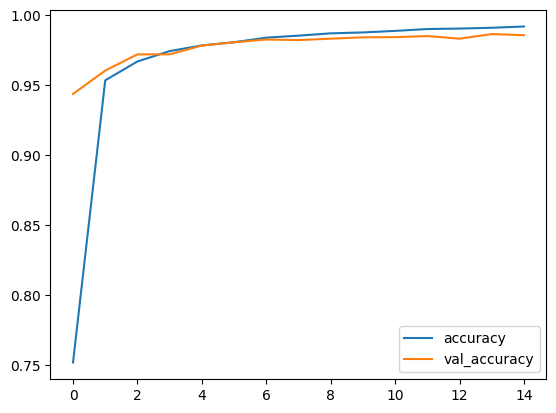

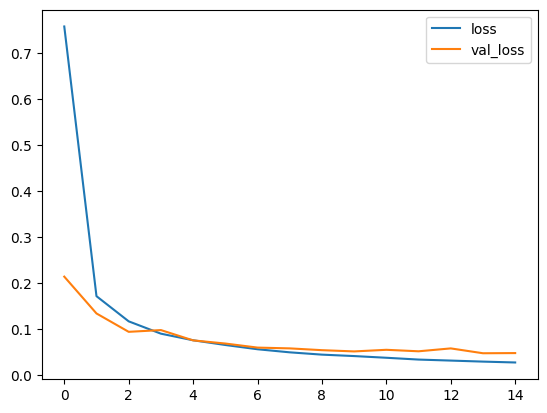

In [15]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [16]:
ypred = np.argmax(model.predict(xtestS), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [17]:
print(confusion_matrix(ytest,ypred))
print()
print(classification_report(ytest,ypred))

[[ 977    0    0    0    0    0    1    1    1    0]
 [   1 1127    4    0    0    0    2    1    0    0]
 [   2    3 1025    0    0    0    1    1    0    0]
 [   1    0    2  998    0    2    0    1    4    2]
 [   0    4    1    0  962    0    3    0    2   10]
 [   3    0    0    6    0  873    5    0    2    3]
 [   7    2    1    0    2    4  942    0    0    0]
 [   0    1   10    2    2    0    0 1004    1    8]
 [   4    1    5    2    1    1    1    4  952    3]
 [   2    2    0    0    2    2    0    2    1  998]]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([0])

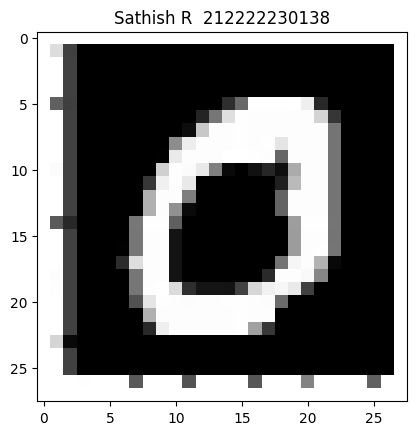

In [19]:
img = image.load_img('/content/drive/MyDrive/deep_learning/exp_3/image.jpg')
tensor_img = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(tensor_img,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
plt.title('Sathish R  212222230138')
np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)